In [ ]:
from sympy import Line, Polygon, Point, pi, Line, Segment
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
lt = [[0, 0],
      [300, 0],
      [400, 300],
      [200, 400],
      [100, 300]]

# calculate columns
co_x = [i[0] for i in lt]
co_x.sort()
min_x, max_x = co_x[0], co_x[-1]


col_shed = []
number_of_column_hint = 5
avg_column_width = (max_x - min_x)/number_of_column_hint
start = co_x[0]
for i in co_x:
  if i - start > avg_column_width:
    col_shed.append(i)
    start = i
if co_x[-1] != start:
  col_shed[-1] = co_x[-1]

sub_polygons = []
sub_pol = pol
for i in range(len(col_shed)-1):
  left_pol = sub_pol.cut_section(Line((col_shed[i],0),slope = 90))[0]
  sub_pol = sub_pol.cut_section(Line((col_shed[i],0),slope = 90))[1]
  sub_polygons.append(left_pol)
sub_polygons.append(sub_pol)

In [ ]:
#calculate rows

max_height = 80
floor_height =3
building_interval = 1.6
building_depth = 15

all_col_res = []
for polygon in sub_polygons:
  y_min, y_max = polygon.bounds[1], polygon.bounds[3]

  for y in range(int(y_max)-1, int(y_min) + building_depth, -1):
    ll = Line(Point(0,y, evaluate = False), Point(1,y, evaluate = False))
    pt = polygon.intersection(ll)
    begin_p1 = pt[0]
    begin_p2 = pt[1]
    seg_len = begin_p1.distance(begin_p2)
    if seg_len > 20: 
      break

  col_res = []
  max_floor = max_height//floor_height
  for i in range(3, max_floor+1):  
    dist = int(i * floor_height * building_interval + building_depth)
    list_of_points = []
    total_len = 0
    list_of_points.append([begin_p1,begin_p2])
    total_len += seg_len
    y_start = y - dist
    while y_start > y_min + building_depth :
      l = Line(Point(0,y_start, evaluate = False), Point(1,y_start, evaluate = False))
      pts = polygon.intersection(l)
      p1 = pts[0]
      p2 = pts[1]
      di = p1.distance(p2)
      if di > 20: 
        list_of_points.append([p1,p2])
        total_len += di
      y_start -= dist
    dic = {'total_len' : total_len*i}
    dic['num_of_floor'] = i
    dic['list_of_points'] = list_of_points
    col_res.append(dic)
    y_start = y

  col_res.sort(key = lambda x:x['total_len'], reverse = True)
  all_col_res.append(col_res)


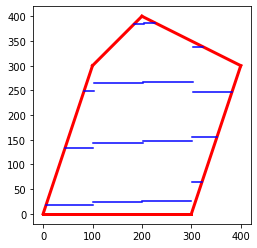

In [ ]:
# lot the plan
plt.axes()

#plot the boundary of the site
lt.append(lt[0])
for i in range(len(lt)-1):
  line = plt.Line2D((lt[i][0],lt[i+1][0]),(lt[i][1], lt[i+1][1]), color = 'red', lw=3)  
  plt.gca().add_line(line)

for j in all_col_res:
  to_plt = j[0]['list_of_points']
  n = len(to_plt)
  for i in range(n):
    line = plt.Line2D((to_plt[i][0].x, to_plt[i][1].x), (to_plt[i][0].y, to_plt[i][1].y), color = 'blue', lw=1.5)  
    plt.gca().add_line(line)
plt.axis('scaled')
plt.show()
